# Descriptive Statistics 

### Question 1
Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df_all_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\PEA25_estimated_population.xlsx", sheet_name="Unpivoted")

In [3]:
df_all_data.head()

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [4]:
df_all_data.describe()

,Year,VALUE
count,324.000000,324.000000
mean,2014.500000,1052.622531
std,5.196152,1492.635331
min,2006.000000,21.300000
25%,2010.000000,58.975000
50%,2014.500000,121.350000
75%,2019.000000,2145.400000
max,2023.000000,5281.600000


In [5]:
df_all_data.Year.value_counts()

2006    18
2007    18
2022    18
2021    18
2020    18
2019    18
2018    18
2017    18
2016    18
2015    18
2014    18
2013    18
2012    18
2011    18
2010    18
2009    18
2008    18
2023    18
Name: Year, dtype: int64

In [6]:
#We count the values
year_counts = df_all_data['Year'].value_counts()
relative_frequencies = year_counts / len(df_all_data)

In [7]:
#We create the subtable to find the relative frequency
subtable = pd.DataFrame({'State': year_counts.index, 
                         'Frequency': year_counts.values, 
                         'Relative Frequency': relative_frequencies.values})
subtable

,State,Frequency,Relative Frequency
0,2006,18,0.055556
1,2007,18,0.055556
2,2022,18,0.055556
3,2021,18,0.055556
4,2020,18,0.055556
5,2019,18,0.055556
6,2018,18,0.055556
7,2017,18,0.055556
8,2016,18,0.055556
9,2015,18,0.055556


In [8]:
mean_value_col = df_all_data['VALUE'].mean()
print(mean_value_col)

1052.6225308641976


In [9]:
median_value_col = df_all_data['VALUE'].median()
print(median_value_col)

121.35


In [10]:
mode = df_all_data['VALUE'].mode()
print(mode)

0    115.5
Name: VALUE, dtype: float64


In [11]:
df_all_data['VALUE']

0      4232.9
1        43.8
2       132.5
3       115.5
4      3802.4
        ...  
319      50.0
320     122.6
321      40.5
322    2287.5
323     174.7
Name: VALUE, Length: 324, dtype: float64

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Num of cells with a value in this range'),
 Text(0.5, 1.0, 'Population Values Histogram')]

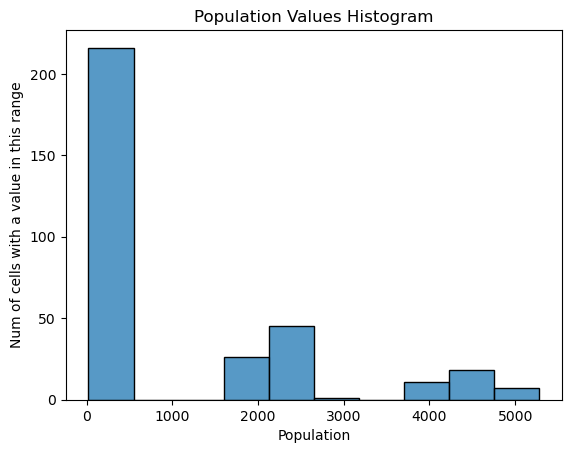

In [12]:
ax = sns.histplot(df_all_data.VALUE)
ax.set(xlabel='Population', ylabel='Num of cells with a value in this range', title ='Population Values Histogram')

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Num of cells with a value in this range'),
 Text(0.5, 1.0, 'Population Values Histogram')]

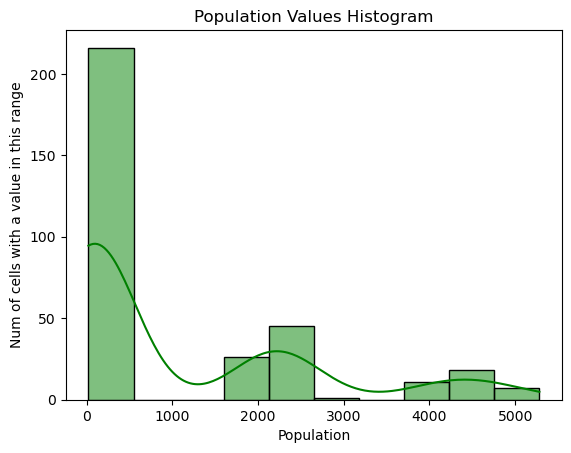

In [13]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram.
ax = sns.histplot(df_all_data.VALUE, kde=True, color ='green')
ax.set(xlabel='Population', ylabel='Num of cells with a value in this range', title ='Population Values Histogram')

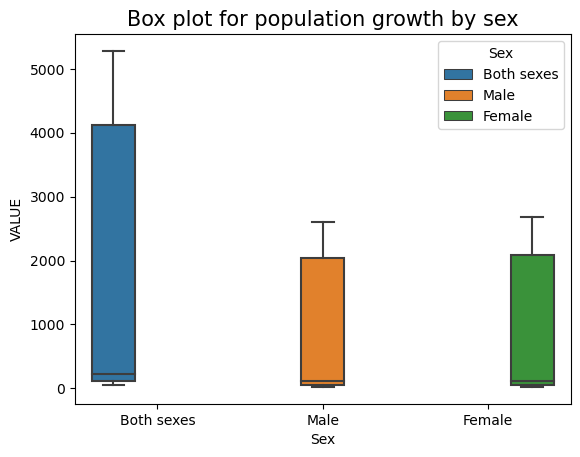

In [14]:
sns.boxplot(x = 'Sex', y ='VALUE', data=df_all_data, hue = 'Sex')
plt.title('Box plot for population growth by sex', fontsize=15)
#plt.legend([], [], frameon=False)
plt.show()

In [15]:
total_pop_by_category = df_all_data.drop(["Year", "Statistic Label", "Citizenship", "UNIT"], axis=1)
total_pop_by_category = total_pop_by_category.groupby('Sex', axis = 0).sum()
total_pop_by_category

,VALUE
Sex,
Both sexes,170524.9
Female,85940.5
Male,84584.3


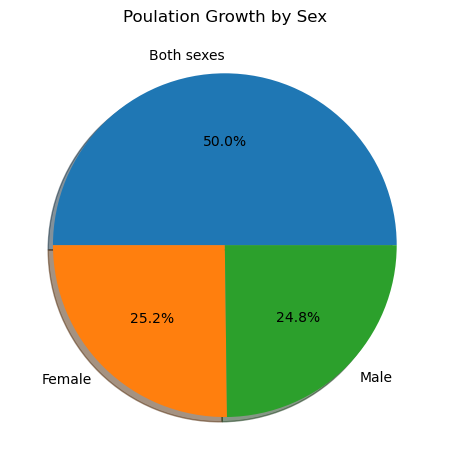

In [16]:
Sex = ['Both sexes', 'Female', 'Male']
total_pop_by_category['VALUE'].plot(kind='pie', labels = Sex, radius=1, autopct='%1.1f%%', shadow = True)
plt.title('Poulation Growth by Sex')
plt.ylabel("")
plt.tight_layout()

In [17]:
total_pop_by_category

,VALUE
Sex,
Both sexes,170524.9
Female,85940.5
Male,84584.3


In [18]:
total_pop_by_category.reset_index(inplace=True)
total_pop_by_category

,Sex,VALUE
0,Both sexes,170524.9
1,Female,85940.5
2,Male,84584.3


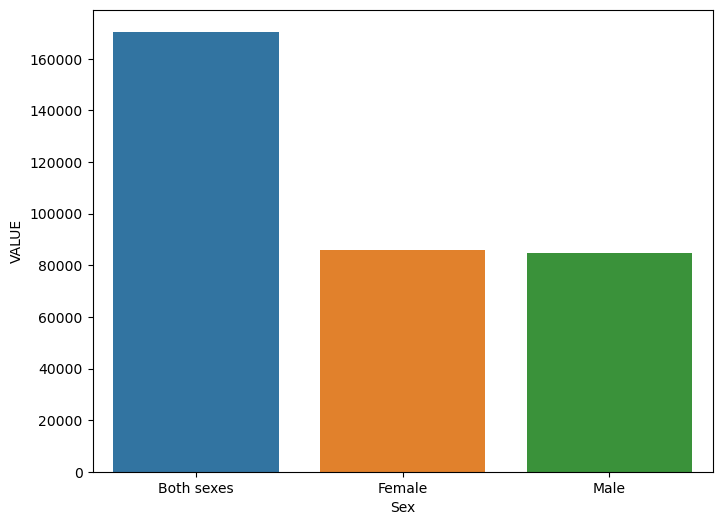

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="Sex", y="VALUE", data=total_pop_by_category)

### Question 2

Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. [0-30]

### Binomial Distribution

In [20]:
!pip install matplotlib
!pip install scipy

In [21]:
from scipy.stats import binom

In [22]:
total_pop_both_sexs_2023 = df_all_data[((df_all_data['Sex'] == "Both sexes") & (df_all_data['Citizenship'] == "All Countries") & (df_all_data['Year'] == 2023))]
total_pop_both_sexs_2023 = total_pop_both_sexs_2023['VALUE']  # returns total population for both sexs in all countries for 2023
total_pop_both_sexs_2023 # 5281.6 total population for both sexs in 2023
total_pop_both_sexs_2023 = int(total_pop_both_sexs_2023) # Convert returned value to an int
#total_pop_both_sexs_2023

total_pop_female_2023 = df_all_data[((df_all_data['Sex'] == "Female") & (df_all_data['Citizenship'] == "All Countries") & (df_all_data['Year'] == 2023))]
total_pop_female_2023 = total_pop_female_2023['VALUE']  # returns total female population in all countries for 2023
total_pop_female_2023 # 2675.4 total female population for 2023
total_pop_female_2023 = int(total_pop_female_2023) # Convert returned value to an int
#total_pop_female_2023

probability_of_female = total_pop_female_2023 / total_pop_both_sexs_2023
#probability_of_female # 0.506551045137837


# The PMF is a probability measure that gives us probabilities of the possible values for a random variable.
result = binom.pmf(k = 3, n= 10, p = probability_of_female)
print("Probability of 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of 3 out of 10 random people being female 0.11%


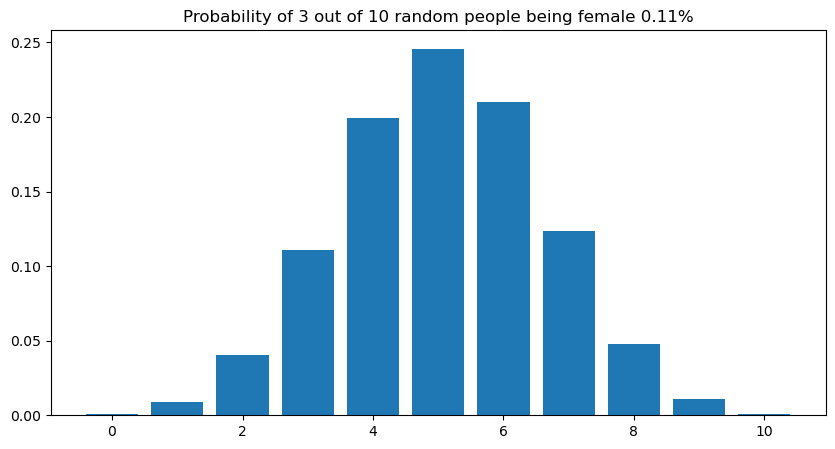

In [23]:
# setting the values of n and p 
n = 10
p = probability_of_female
# defining list of r values 
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.pmf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of 3 out of 10 random people being female 0.11%")
plt.show()

In [24]:
# The binomial cumulative distribution function lets you obtain the probability of observing less than or equal to x 
# successes in n trials, with the probability p of success on a single trial.
result = binom.cdf(k = 2, n= 10, p = probability_of_female)
print("Probability of less then 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of less then 3 out of 10 random people being female 0.05%


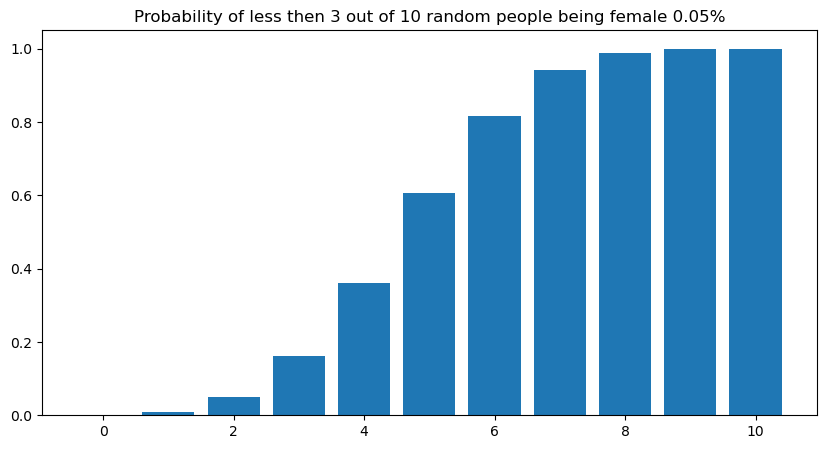

In [25]:
# setting the values of n and p 
n = 10
p = probability_of_female
r = 2
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.cdf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of less then 3 out of 10 random people being female 0.05%")
plt.show()

In [26]:
# The binomial cumulative distribution function lets you obtain the probability of observing less than or equal to x 
# successes in n trials, with the probability p of success on a single trial.
result = binom.cdf(k = 3, n= 10, p = probability_of_female)
print("Probability of 3 or less people out of 10 random people being female " + str(round(result,2)) + "%")

Probability of 3 or less people out of 10 random people being female 0.16%


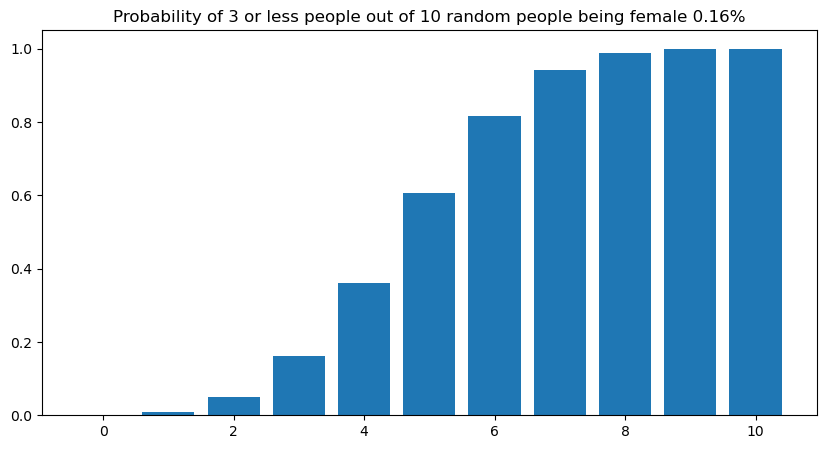

In [27]:
# setting the values of n and p 
n = 10
p = probability_of_female
r = 3
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.cdf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of 3 or less people out of 10 random people being female 0.16%")
plt.show()

In [28]:
# calculates the probability of having more than k out of n iterations
# Survival function (1-cdf — sometimes more accurate).
result = binom.sf(k = 3, n = 10, p = probability_of_female)
print("Probability of more then 3 out of 10 random people being female " + str(round(result,2)) + "%")

Probability of more then 3 out of 10 random people being female 0.84%


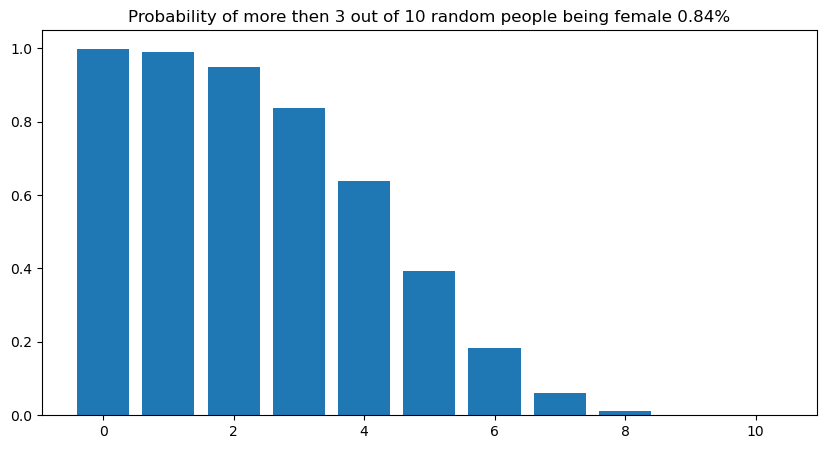

In [29]:
# setting the values of n and p 
n = 10
p = probability_of_female
# defining list of r values
r_values = list(range(n + 1)) 
# list of pmf values 
dist = [binom.sf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability of more then 3 out of 10 random people being female 0.84%")
plt.show()

### Poisson distribution

Find the average poulation growth for all years so it can be used as mu inside of poisson calculations

In [62]:
df_all_years_unique = df_all_data.Year.unique()
print("Unique year values inside of dataset: " + str(df_all_years_unique))
print("Number of elements inside of unique year values array: " + str(df_all_years_unique.size)) # 18

# Two columns can be dropped as they do not give any value to further calculations
df_columns_dropped = df_all_data.drop(["Statistic Label", "UNIT"], axis=1)
df_columns_dropped.head(5) # Print first five rows to ensure the correct columns were dropped

total_pop_by_year = df_columns_dropped[((df_all_data['Sex'] == "Both sexes") & (df_columns_dropped['Citizenship'] == "All Countries"))]
total_pop_by_year = total_pop_by_year.drop(["Year", "Sex", "Citizenship"], axis=1)
total_pop_by_year = total_pop_by_year.to_numpy()
total_pop_by_year = total_pop_by_year.flatten()
print("Total population values by year: " + str(total_pop_by_year))
print("Number of elements inside of total population values by year array: " + str(total_pop_by_year.size)) # 18

# remove last total population value
total_pop_without_2023_val = total_pop_by_year.tolist()
total_pop_without_2023_val.pop()
print("List without 2023 value: ", total_pop_without_2023_val) # print the new list that does not have the 2023 value
print("List without 2023 value: ", len(total_pop_without_2023_val)) # 17

# remove first total population value
total_pop_without_first_val = total_pop_by_year.tolist()
total_pop_without_first_val.pop(0)
print("List without 2023 value: ", total_pop_without_first_val) # print the new list that does not have the 2023 value
print("List without 2023 value: ", len(total_pop_without_first_val)) # 17

difference_in_yearly_pop_growth_str = []
for i in range(len(total_pop_without_first_val)):
    value = total_pop_without_first_val[i] - total_pop_without_2023_val[i]
    difference_in_yearly_pop_growth_str.append("{:.1f}".format(value))
print("List with subtracted values values: ", difference_in_yearly_pop_growth_str)
print("List with subtracted values length: ", len(difference_in_yearly_pop_growth_str)) # 17

int_list = [eval(i) for i in result]
print("Modified list is: ", int_list)

sum_of_pop_growth = sum(res)
print("Sum of population growth for all years: ", "{:.2f}".format(sum_of_pop_growth)) # 1048.70 thousand

average_growth = Sum / 17
print("Average population growth for all years: ", "{:.2f}".format(average_growth)) # 61.69 thousand


Unique year values inside of dataset: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023]
Number of elements inside of unique year values array: 18
Total population values by year: [4232.9 4375.8 4485.1 4533.4 4554.8 4574.9 4593.7 4614.7 4645.4 4687.8
 4739.6 4810.9 4884.9 4958.5 5029.9 5074.7 5184.  5281.6]
Number of elements inside of total population values by year array: 18
List without 2023 value:  [4232.9, 4375.8, 4485.1, 4533.4, 4554.8, 4574.9, 4593.7, 4614.7, 4645.4, 4687.8, 4739.6, 4810.9, 4884.9, 4958.5, 5029.9, 5074.7, 5184.0]
List without 2023 value:  17
List without 2023 value:  [4375.8, 4485.1, 4533.4, 4554.8, 4574.9, 4593.7, 4614.7, 4645.4, 4687.8, 4739.6, 4810.9, 4884.9, 4958.5, 5029.9, 5074.7, 5184.0, 5281.6]
List without 2023 value:  17
List with subtracted values values:  ['142.9', '109.3', '48.3', '21.4', '20.1', '18.8', '21.0', '30.7', '42.4', '51.8', '71.3', '74.0', '73.6', '71.4', '44.8', '109.3', '97.6']
List with subtrac

In [86]:
from scipy.stats import poisson

In [87]:
# The PMF is a probability measure that gives us probabilities of the possible values for a random variable.
# Population in Ireland grows 61.69 thousand per year on average. 
# What is the probability that the population will grow 100 thousand on a given year?
result = poisson.pmf(k = 100, mu = 61.69)
# Python f-strings, or formatted string literals, were introduced in Python 3.6.
print(f"Probability of population growing 100 thousand on a given year: {result:.7f}%")


Probability of population growing 100 thousand on a given year: 0.0000018%


(array([1.57456472e-06, 1.71990916e-05, 9.90310371e-05, 3.06585920e-04,
        4.86964421e-04, 3.97032551e-04, 1.64905375e-04, 3.65026495e-05,
        3.96669190e-06, 2.42240727e-07]),
 array([613803. , 614463.5, 615124. , 615784.5, 616445. , 617105.5,
        617766. , 618426.5, 619087. , 619747.5, 620408. ]),
 <BarContainer object of 10 artists>)

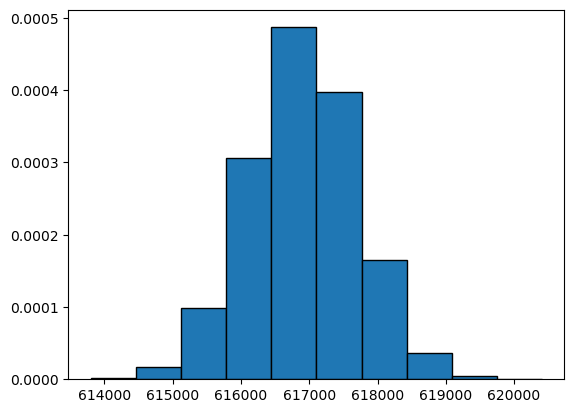

In [104]:
#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=616900, size=100000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

In [98]:
# The Poisson cumulative distribution function lets you obtain the probability of an event occurring within a given time 
# or space interval less than or equal to x times if on average the event occurs λ times within that interval.

# Population in Ireland grows 61.69 thousand per year on average. 
# What is the probability that population growth will be 40 thousand or less on a given year?
result = poisson.cdf(k = 40, mu = 61.69)
# Python f-strings, or formatted string literals, were introduced in Python 3.6.
print(f"Probability of population growth being 40 thousand or less on a given year: {result:.7f}%")

Probability of population growth being 40 thousand or less on a given year: 0.0021375%


In [ ]:
# The Poisson cumulative distribution function lets you obtain the probability of an event occurring within a given time 
# or space interval less than or equal to x times if on average the event occurs λ times within that interval.

# Population in Ireland grows 61.69 thousand per year on average. 
# What is the probability that population growth will be 40 thousand or less on a given year?
result = poisson.cdf(k = 40, mu = 61.69)
# Python f-strings, or formatted string literals, were introduced in Python 3.6.
print(f"Probability of population growth being 40 thousand or less on a given year: {result:.7f}%")

In [101]:
#Greater than 61.69 thousand --> P( x > 61.69 thousand) or P( X >= num higher then 61.69 thousand)
# Survival function (1-cdf — sometimes more accurate).
result = poisson.sf(k = 61.69, mu = 61.69)
print(f"Probability of population growing higher then 61.69 thousand on a given year: {result:.7f}%")

Probability of population growth being 40 thousand or less on a given year: 0.5011695%


In [102]:
#Between 20 thousand and 50 thousand inclusive
# P(x=<50) - P(x=<10)

result = poisson.cdf(k = 50, mu = 61.69) - poisson.cdf(k = 10, mu = 61.69)
print(f"Probability of population growing between 20 and 50 thousand on a given year: {result:.7f}%")

Probability of population growing between 20 and 50 thousand on a given year: 0.0736097%


### Question 3

Use Normal distribution to explain or identify some information about your dataset. 

In [105]:
# dataset has already been prepared in question 2
total_pop_by_year

array([4232.9, 4375.8, 4485.1, 4533.4, 4554.8, 4574.9, 4593.7, 4614.7,
       4645.4, 4687.8, 4739.6, 4810.9, 4884.9, 4958.5, 5029.9, 5074.7,
       5184. , 5281.6])

In [145]:
# Convert a NumPy Array to Pandas DataFrame
print(type(total_pop_by_year))

dataset = pd.DataFrame(total_pop_by_year, columns = ['VALUE'])
print(dataset)
print(type(dataset))

<class 'numpy.ndarray'>
     VALUE
0   4232.9
1   4375.8
2   4485.1
3   4533.4
4   4554.8
5   4574.9
6   4593.7
7   4614.7
8   4645.4
9   4687.8
10  4739.6
11  4810.9
12  4884.9
13  4958.5
14  5029.9
15  5074.7
16  5184.0
17  5281.6
<class 'pandas.core.frame.DataFrame'>


In [146]:
# Find the mean and the std
dataset.describe()

,VALUE
count,18.000000
mean,4736.811111
std,283.662942
min,4232.900000
25%,4559.825000
50%,4666.600000
75%,4940.100000
max,5281.600000


In [160]:
from scipy.stats import norm

mean = 4737
std_dev = 284

In [161]:
# X = Average yearly population growth for years 2006 -> 2023 is: 61.69 thousand
# X = total population 2023 (5281.6) + average population growth over 18 years (61.69) = 5,343.29 thousand
result = norm.cdf(5343,mean, std_dev)
print(f"Probability that we are on the same range of growth as other years: {result:.7f}%")

Probability that we are on the same range of growth as other years: 0.9835705%


10 years have been selected. To check the probability that more than 4 years grow less than 61.69 thousand in population?

Y = number of years that grew less than 61.69 thousand
n = 10; p = 0.98

In [170]:
#P(Y > 4)
result = binom.sf(k = 4, n = 10, p = 0.98)
print(f"Probability that we are on the same range of growth as other years: {result:.8f}%")

Probability that we are on the same range of growth as other years: 0.99999999%


To check the probability of finding 5 years with growth over a 10 year period
n = 10, p = 0.98

In [169]:
result = binom.pmf(k = 5, n = 10, p = 0.06)
print(f"Probability that we are on the same range of growth as other years: {result:.7f}%")

Probability that we are on the same range of growth as other years: 0.0001438%


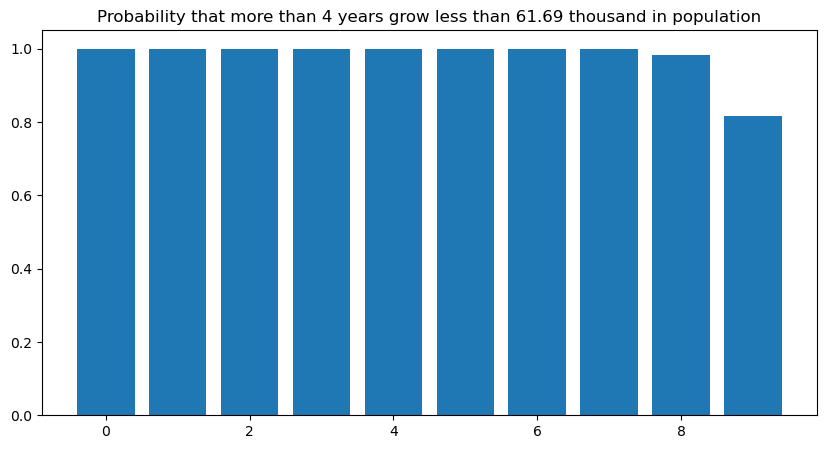

In [159]:
# setting the values of n and p 
n = 10
p = 0.98
# defining list of r values
r_values = list(range(n)) 
# list of pmf values 
dist = [binom.sf(r, n, p) for r in r_values ] 
# plotting the graph  
plt.figure(figsize=(10,5))
plt.bar(r_values, dist) 
plt.title("Probability that more than 4 years grow less than 61.69 thousand in population")
plt.show()